In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def gaussian2D(params, x, y):
    mu_x, mu_y, sigma_x, sigma_y = params
    return np.exp(((x-mu_x)**2)/(2*sigma_x) + ((y-mu_y)**2)/(2*sigma_y))

In [7]:
p = 0, 0, 1, 1

x=y=np.arange(-10,10,1)
gaussian2D(p, x,y)

array([  2.68811714e+43,   5.54062238e+34,   6.23514908e+27,
         7.01673591e+20,   4.31123155e+15,   2.64891221e+10,
         8.88611052e+06,   2.98095799e+03,   5.45981500e+01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         5.45981500e+01,   2.98095799e+03,   8.88611052e+06,
         2.64891221e+10,   4.31123155e+15,   7.01673591e+20,
         6.23514908e+27,   5.54062238e+34])

In [8]:
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

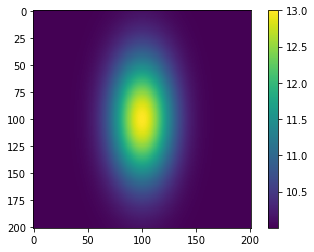

In [9]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

In [16]:
import scipy.optimize as opt

initial_guess = (3,90,90,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

/home/jp/miniconda2/envs/moscatel/lib/python2.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


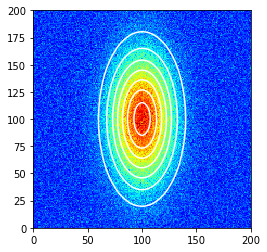

In [17]:
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')
plt.show()